In [ ]:
%load_ext autoreload
%autoreload 2

import exprmat as em

In [2]:
# set working directory
em.setwd('/home/data/yangz/shared/data/single-cell-rna/demo-nichenet')

In [4]:
meta = em.metadata(
    locations = ['anndata.h5ad'],
    modality = ['rna'],
    names = ['test'],
    batches = ['test'],
    groups = ['test'],
    default_taxa = ['mmu']
)

meta.dataframe

,location,sample,batch,group,modality,taxa
0,anndata.h5ad,test,test,test,rna,mmu


In [5]:
expm = em.experiment(meta, save_simultaneously = False)

[i] reading sample test [rna] ...
[i] 1215 genes (out of 13541) not in the reference gene list.
[i] total 12326 genes mapped. 12325 unique genes.


In [7]:
expm.merge()

In [8]:
print(expm)

annotated data of size 5027 × 12325
integrated dataset of size 5027 × 12325
contains modalities: rna

 modality [rna]
    obs : aggregate <cat> celltype <cat> modality <o> taxa <o> barcode <o> ubc <o> sample <cat>
    var : chr <o> start <i64> end <i64> strand <o> id <o> subtype <o> gene <o> tlen <f64>
          cdslen <i64> assembly <o> uid <o>
 layers : counts <f64>

[*] composed of samples:
  test    rna   mmu    batch test    of size 5027 × 12325



In [9]:
expm['rna'].obs

,aggregate,celltype,modality,taxa,barcode,ubc,sample
test:1,SS,CD8 T,rna,mmu,W380370,test:1,test
test:2,SS,CD4 T,rna,mmu,W380372,test:2,test
test:3,SS,CD4 T,rna,mmu,W380374,test:3,test
test:4,SS,CD8 T,rna,mmu,W380378,test:4,test
test:5,SS,CD4 T,rna,mmu,W380379,test:5,test
...,...,...,...,...,...,...,...
test:5023,LCMV,CD4 T,rna,mmu,W673547,test:5023,test
test:5024,LCMV,CD4 T,rna,mmu,W673548,test:5024,test
test:5025,LCMV,CD8 T,rna,mmu,W673549,test:5025,test
test:5026,LCMV,CD4 T,rna,mmu,W673550,test:5026,test


In [ ]:
expm.run_rna_markers(
    groupby = 'aggregate',
    mask_var = None, 
    groups = ['LCMV'],
    reference = 'SS',
    n_genes = None, rankby_abs = False, pts = True, 
    key_added = 'deg',
    method = 't-test', 
    corr_method = 'benjamini-hochberg',
    tie_correct = False,
    gene_symbol = 'gene',
    layer = 'X'
)

In [16]:
upreg = expm.get_rna_markers(
    de_slot = 'deg',
    min_pct = 0.1,
    max_pct_reference = 0.75,
    max_q = 0.05,
    min_lfc = 0.5, max_lfc = 25,
    remove_zero_pval = False
)

upreg

[i] fetched diff `LCMV` over `SS` (351 genes)


,names,scores,lfc,p,q,gene,pct,log10.p,log10.q
0,rna:mmu:g54304,72.299828,5.026062,0.000000,0.000000,Irf7,0.842769,inf,inf
1,rna:mmu:g29664,63.548306,5.349899,0.000000,0.000000,Ifit3,0.675759,inf,inf
2,rna:mmu:g13333,53.927185,3.888075,0.000000,0.000000,Ifi27l2b,0.971436,inf,inf
3,rna:mmu:g20725,53.207096,3.946182,0.000000,0.000000,Ly6a,0.891920,inf,inf
4,rna:mmu:g13332,52.749245,3.953723,0.000000,0.000000,Ifi27l2a,0.855636,inf,inf
...,...,...,...,...,...,...,...,...,...
1365,rna:mmu:g11046,3.175910,0.519943,0.001515,0.009963,Wbp2,0.113999,2.819504,2.001601
1381,rna:mmu:g53436,3.153274,0.565398,0.001638,0.010634,Pde3b,0.101904,2.785801,1.973310
1393,rna:mmu:g73788,3.135348,0.501033,0.001741,0.011161,Gm13835,0.119918,2.759313,1.952280
1420,rna:mmu:g48144,3.109823,0.527380,0.001897,0.011921,Arhgap25,0.107566,2.721981,1.923672


In [22]:
expm.run_rna_nichenet(
    taxa = 'mmu',
    receiver = ['LCMV'],
    sender = None,
    identity = 'aggregate',
    foreground = upreg['gene'].tolist(),
    background = None,
    expression_threshold = 0.01,
    ncpus = 40,
    key_added = 'nichenet'
)

[i] background gene set constructed with size 10573
[i] using user-specified foreground gene set of size 351
[i] using 794(all) potential ligands
[i] using 278 expressed receptors in receivers


   ━━━━━━━━━━━━━━━━━━ predicting ligand activities   794 / 794   (06:21 < 00:00)


In [24]:
expm['rna'].uns['nichenet']['activities'].head(20)

,ligand,auroc,aupr,aupr.adj,pearson
609,Ifna1,0.705443,0.261113,0.229145,0.385590
568,Ifnb1,0.704944,0.242410,0.210441,0.323094
736,Ifnl3,0.705875,0.225629,0.193660,0.297028
656,Il27,0.712866,0.211777,0.179809,0.300352
97,Ifng,0.709801,0.188995,0.157027,0.288155
723,Ifne,0.687843,0.132894,0.100925,0.186057
322,Ifnk,0.692588,0.123109,0.091141,0.176261
66,Ebi3,0.693697,0.119196,0.087228,0.172524
197,Ifnl2,0.686366,0.113422,0.081454,0.165845
274,Ifitm6,0.662920,0.112092,0.080123,0.159604


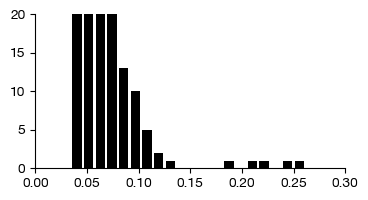

In [ ]:
from exprmat.plotting.utils import hist
fig = hist(
    expm['rna'].uns['nichenet']['activities']['aupr'], 
    xrange = (0, 0.30), yrange = (0, 20), figsize = (4, 2), bins = 20, rwidth = 0.8
)

In [40]:
expm.run_rna_nichenet_infer_targets(
    key_nichenet = 'nichenet',
    ligands = 10,
    n_targets = 250
)

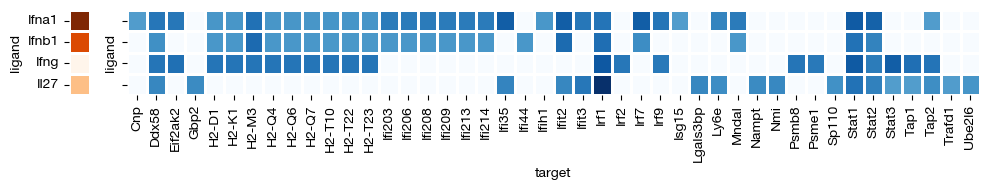

In [42]:
fig = expm.plot_rna_nichenet_ligands(
    key_nichenet = 'nichenet',
    figsize = (10, 2),
    width_ratios = [0.2, 8]
)